In [ ]:
#----------------------------------------------------------#
# An example of parameters estimation of a CKLS stochastic
# process
#----------------------------------------------------------#

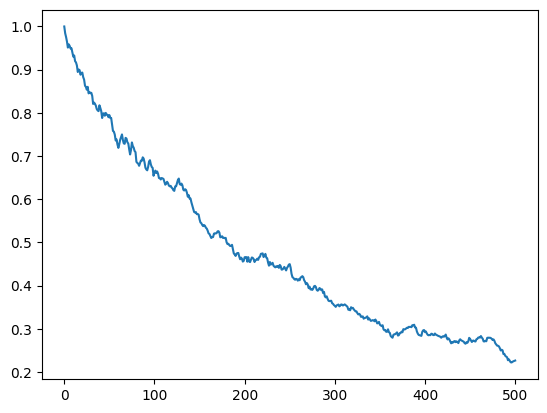

In [1]:
import numpy as np
from stochastic_library import *
from estimation_library import *

import matplotlib.pyplot as plt


X0 = 1
T  = 500
dt = 1/252
params = np.array( [ 0.3 , -1.5 , 0.15 , 0.8 ] )

X = CKLS_process( X0 , T , dt , params )
plt.plot( X )
plt.show()

In [2]:
# params = np.array( [ 0.1 , -0.5 , 0.15 , 1.5 ] )

theta_0 = np.array( [ 0.5 , -1 , 1.2 , 0.4 ] )
theta_min = np.array( [ 0 , -5 , 0 , 0 ] )
theta_max = np.array( [ 5 , 0 , 5 , 5 ] )

qmle_res = qmle_estimation( X , dt , theta_0 , theta_min , theta_max )
theta_qmle = np.array( [ qmle_res.x[0] , qmle_res.x[1] , qmle_res.x[2] , qmle_res.x[3] ] )
print( theta_qmle )

C:\Users\marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 96, function evaluations: 400, CG iterations: 268, optimality: 9.54e-05, constraint violation: 0.00e+00, execution time:  4.9 s.
[ 0.21618543 -1.26972187  0.14400697  0.81682774]


In [5]:
alpha_0 = 2; beta_0  = 2; sigma_0 = 2; gamma_0 = 2
delta_1 = 1; delta_2 = 1; delta_3 = 1; delta_4 = 1
penalties = np.array( [ alpha_0 , beta_0 , sigma_0 , gamma_0 ] )
delta     = np.array( [ delta_1 , delta_2 , delta_3 , delta_4 ] )

lasso_res = lasso_estimation( X , dt , theta_qmle , theta_qmle , theta_min , theta_max , penalties , delta )
theta_lasso = np.array( [ lasso_res.x[0] , lasso_res.x[1] , lasso_res.x[2] , lasso_res.x[3] ] )
print(theta_lasso)

`gtol` termination condition is satisfied.
Number of iterations: 30, function evaluations: 130, CG iterations: 83, optimality: 6.86e-07, constraint violation: 0.00e+00, execution time: 1.7e+01 s.
[ 0.10807437 -1.00615237  0.1428272   0.80814961]


In [27]:
# Example of symbolic tool usage for expressions solving

# from sympy import Symbol, Matrix, Function, simplify , hessian
# import sympy as sp
# from sympy.tensor.array import derive_by_array

# alpha = Symbol('alpha')
# beta  = Symbol('beta')
# sigma = Symbol('sigma')
# gamma = Symbol('gamma')
# X_i   = Symbol('X_i')
# Delta_t = Symbol('Delta\_t')
# Delta_X = Symbol('Delta\_X')

# f1 = (1/2)*sp.ln( sp.Pow( sigma * sp.Pow( X_i , gamma ) , 2 ) )
# f2 = (1/2)*(1/Delta_t)*sp.Pow( sigma * sp.Pow( X_i , gamma ) , -2 )*sp.Pow( Delta_X-(alpha+beta*X_i)*Delta_t , 2 )
# f = f1+f2
# # simplify(f)

# # derive_by_array(f, (alpha, beta,sigma,gamma))

# hessian(f,list((alpha, beta,sigma,gamma)))